In [1]:
data=open('Alice-in-wonderland.txt','r')
raw=data.readlines()
story=raw[127:5405]
story=story[39:]

In [2]:
import re
r1=re.findall(r"\n\n[ A-Z]+\n",''.join(story))
# print(r1)
character_entry_order=list()
for ele in r1:
    dat=ele.strip(" \n")
    if(dat.startswith("SCENE") or dat.startswith("ACT")):
        pass
    else:
        character_entry_order.append(dat)
unique_characters=list(set(character_entry_order))

In [3]:
unique_characters

['MOCK TURTLE',
 'OTHERS',
 'RED QUEEN',
 'DORMOUSE',
 'DUM',
 'DEE',
 'HATTER',
 'CARROLL',
 'QUEEN',
 'KNAVE',
 'BOTH QUEENS',
 'RABBIT',
 'CURTAIN',
 'JURY',
 'MARCH HARE',
 'QUEEN OF HEARTS',
 'ALL THE GARDENERS',
 'CAT',
 'WHITE RABBIT',
 'COURT',
 'DUCHESS',
 'CATERPILLAR',
 'WHITE QUEEN',
 'HUMPTY DUMPTY',
 'FROG',
 'ONE JUROR',
 'JURORS',
 'ALICE',
 'JABBERWOCKY',
 'EVERYBODY',
 'GRYPHON',
 'KING']

In [4]:
unique_characters_processed=list()
for ele in unique_characters:
    unique_characters_processed.append(ele.lower())

In [5]:
story_processed=list()
for ele in story:
    story_processed.append(ele.strip("\n").lower())
# story_processed=re.sub(r"\[[^\]]*\]",r'__',''.join(story_processed))
print(story_processed)

['act i', '', '', 'scene one', '', "_alice's home. lewis carroll is discovered, playing chess. golden-haired", 'alice, in a little blue dress, a black kitten in her arms, stands watching', 'him._', '', '', 'alice', '', "that's a funny game, uncle. what did you do then?", '', '', 'carroll', '', 'a red pawn took a white pawn; this way. you see, alice, the chessboard is', 'divided into sixty-four squares, red and white, and the white army tries', "to win and the red army tries to win. it's like a battle!", '', '', 'alice', '', 'with soldiers?', '', '', 'carroll', '', "yes, here are the kings and queens they are fighting for. that's the red", "queen and here's the white queen.", '', '', 'alice', '', 'how funny they look!', '', '', 'carroll', '', 'see the crowns on their heads, and look at their big feet.', '', '', 'alice', '', "it's a foot apiece, that's what it is! do they hump along like this?", '', '', 'carroll', '', "here! you're spoiling the game. i must keep them all in their right",

In [6]:
expression='|'.join(unique_characters_processed)
expression='('+expression+')+'

In [7]:
data=re.findall(expression,' '.join(story_processed))

In [8]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 

def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 
 
text_data = [data]
 
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

In [9]:
for  i in range(31):
    data_matrix.iloc[i:i]=0

In [10]:
data_matrix

,duchess,red queen,all the gardeners,alice,court,one juror,hatter,king,rabbit,everybody,...,march hare,dormouse,mock turtle,both queens,cat,queen,carroll,others,jurors,jury
duchess,6.0,0.0,0.0,26.0,0.0,0.0,0.0,4.0,0.0,1.0,...,2.0,2.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0
red queen,0.0,3.0,0.0,31.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
all the gardeners,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alice,17.0,34.0,1.0,34.0,1.0,1.0,18.0,33.0,4.0,5.0,...,14.0,9.0,22.0,3.0,28.0,34.0,11.0,4.0,0.0,2.0
court,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
one juror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
hatter,0.0,0.0,0.0,22.0,0.0,0.0,2.0,10.0,0.0,0.0,...,11.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
king,3.0,2.0,0.0,35.0,2.0,0.0,11.0,14.0,0.0,1.0,...,6.0,1.0,0.0,0.0,4.0,5.0,2.0,0.0,1.0,4.0
rabbit,0.0,1.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
everybody,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [11]:
#pre-processing the matrix
edge_list=list()
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        if(data_matrix.iloc[i,j]>0 and i!=j):
            edge_list.append((data_matrix.columns[i],data_matrix.columns[j],{"weight":data_matrix.iloc[i,j]}))
            
# edge_list=list(set(edge_list)) 
edge_list

[('duchess', 'alice', {'weight': 26.0}),
 ('duchess', 'king', {'weight': 4.0}),
 ('duchess', 'everybody', {'weight': 1.0}),
 ('duchess', 'white rabbit', {'weight': 5.0}),
 ('duchess', 'march hare', {'weight': 2.0}),
 ('duchess', 'dormouse', {'weight': 2.0}),
 ('duchess', 'cat', {'weight': 3.0}),
 ('duchess', 'queen', {'weight': 4.0}),
 ('red queen', 'alice', {'weight': 31.0}),
 ('red queen', 'king', {'weight': 3.0}),
 ('red queen', 'everybody', {'weight': 1.0}),
 ('red queen', 'dee', {'weight': 3.0}),
 ('red queen', 'jabberwocky', {'weight': 1.0}),
 ('red queen', 'white queen', {'weight': 7.0}),
 ('red queen', 'queen', {'weight': 3.0}),
 ('all the gardeners', 'alice', {'weight': 1.0}),
 ('alice', 'duchess', {'weight': 17.0}),
 ('alice', 'red queen', {'weight': 34.0}),
 ('alice', 'all the gardeners', {'weight': 1.0}),
 ('alice', 'court', {'weight': 1.0}),
 ('alice', 'one juror', {'weight': 1.0}),
 ('alice', 'hatter', {'weight': 18.0}),
 ('alice', 'king', {'weight': 33.0}),
 ('alice', 'r

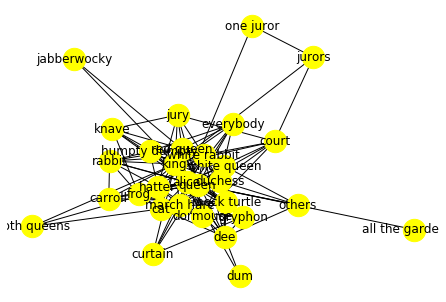

In [12]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()
G.add_edges_from(edge_list)
nx.draw(G, node_size=500, node_color='yellow', with_labels=True)

In [13]:
G.degree('alice')

27

In [14]:
list(G.edges(data=True))

[('duchess', 'alice', {'weight': 17.0}),
 ('duchess', 'king', {'weight': 3.0}),
 ('duchess', 'everybody', {'weight': 3.0}),
 ('duchess', 'white rabbit', {'weight': 3.0}),
 ('duchess', 'march hare', {'weight': 1.0}),
 ('duchess', 'dormouse', {'weight': 2.0}),
 ('duchess', 'cat', {'weight': 4.0}),
 ('duchess', 'queen', {'weight': 7.0}),
 ('duchess', 'court', {'weight': 2.0}),
 ('duchess', 'frog', {'weight': 6.0}),
 ('duchess', 'others', {'weight': 1.0}),
 ('alice', 'red queen', {'weight': 34.0}),
 ('alice', 'all the gardeners', {'weight': 1.0}),
 ('alice', 'court', {'weight': 1.0}),
 ('alice', 'one juror', {'weight': 1.0}),
 ('alice', 'hatter', {'weight': 22.0}),
 ('alice', 'king', {'weight': 35.0}),
 ('alice', 'rabbit', {'weight': 6.0}),
 ('alice', 'everybody', {'weight': 2.0}),
 ('alice', 'dee', {'weight': 9.0}),
 ('alice', 'white rabbit', {'weight': 9.0}),
 ('alice', 'humpty dumpty', {'weight': 20.0}),
 ('alice', 'knave', {'weight': 3.0}),
 ('alice', 'gryphon', {'weight': 8.0}),
 ('al

In [15]:
s='\n The graph details: '
print (s)


a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)

deg=nx.degree(G)

#Converting degree view into list
deg1=list(deg)

#sorting the list based on degree
deg1.sort(key=lambda x:x[1])

a= deg1[0]
s='\n The min degree: ' +repr(a)
print (s)

a = deg1[-1]
s='\n The max degree: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)


 The graph details: 

 The no of nodes: 30

 The no of edges: 129

 The min degree: ('all the gardeners', 1)

 The max degree: ('alice', 27)

 The no of edges: 129


In [16]:
from operator import itemgetter

In [17]:
#Degree Centrality
degc = nx.degree_centrality(G)
# let's list the scores
x=sorted(degc.items(), key=itemgetter(1), reverse=True)
# print(x)
x

[('alice', 0.9310344827586207),
 ('king', 0.8620689655172413),
 ('queen', 0.6896551724137931),
 ('white rabbit', 0.48275862068965514),
 ('duchess', 0.3793103448275862),
 ('dee', 0.3793103448275862),
 ('cat', 0.3448275862068966),
 ('frog', 0.3448275862068966),
 ('march hare', 0.3103448275862069),
 ('dormouse', 0.3103448275862069),
 ('red queen', 0.3103448275862069),
 ('hatter', 0.3103448275862069),
 ('rabbit', 0.3103448275862069),
 ('court', 0.27586206896551724),
 ('gryphon', 0.27586206896551724),
 ('mock turtle', 0.27586206896551724),
 ('everybody', 0.24137931034482757),
 ('humpty dumpty', 0.24137931034482757),
 ('jury', 0.24137931034482757),
 ('white queen', 0.20689655172413793),
 ('knave', 0.20689655172413793),
 ('curtain', 0.1724137931034483),
 ('carroll', 0.1724137931034483),
 ('others', 0.1724137931034483),
 ('both queens', 0.10344827586206896),
 ('jurors', 0.10344827586206896),
 ('jabberwocky', 0.06896551724137931),
 ('one juror', 0.06896551724137931),
 ('dum', 0.0689655172413793

In [18]:
#Betweeness Centrality
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('alice', 0.3121119712252717),
 ('king', 0.21738701227617485),
 ('queen', 0.07819415122370789),
 ('dee', 0.026282352021268277),
 ('white rabbit', 0.025892368441629524),
 ('red queen', 0.018024278676988036),
 ('duchess', 0.011551919618422078),
 ('cat', 0.011330049261083743),
 ('court', 0.010659551176792556),
 ('rabbit', 0.00690241613886934),
 ('frog', 0.006851591211197122),
 ('march hare', 0.0067010712330909375),
 ('hatter', 0.0063589803737586995),
 ('gryphon', 0.005729533192587379),
 ('dormouse', 0.005346391430135272),
 ('humpty dumpty', 0.003817733990147784),
 ('mock turtle', 0.0036359371334740796),
 ('everybody', 0.0034991007897411833),
 ('jurors', 0.003284072249589491),
 ('one juror', 0.0025041050903119866),
 ('jury', 0.0013957307060755337),
 ('curtain', 0.0010946907498631637),
 ('white queen', 0.0007389162561576354),
 ('others', 0.0006568144499178982),
 ('knave', 0.0004926108374384237),
 ('carroll', 0.0004926108374384237),
 ('jabberwocky', 0.0),
 ('all the gardeners', 0.0),
 ('bot

In [19]:
#Closness Centrality
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('alice', 0.9354838709677419),
 ('king', 0.8787878787878788),
 ('queen', 0.7631578947368421),
 ('white rabbit', 0.6590909090909091),
 ('duchess', 0.6170212765957447),
 ('dee', 0.6170212765957447),
 ('cat', 0.6041666666666666),
 ('frog', 0.6041666666666666),
 ('march hare', 0.5918367346938775),
 ('dormouse', 0.5918367346938775),
 ('red queen', 0.5918367346938775),
 ('hatter', 0.5918367346938775),
 ('rabbit', 0.5918367346938775),
 ('court', 0.58),
 ('gryphon', 0.58),
 ('mock turtle', 0.58),
 ('everybody', 0.5686274509803921),
 ('humpty dumpty', 0.5686274509803921),
 ('jury', 0.5686274509803921),
 ('white queen', 0.5576923076923077),
 ('knave', 0.5576923076923077),
 ('curtain', 0.5471698113207547),
 ('carroll', 0.5471698113207547),
 ('both queens', 0.5272727272727272),
 ('others', 0.5272727272727272),
 ('one juror', 0.5087719298245614),
 ('jurors', 0.5),
 ('dum', 0.5),
 ('all the gardeners', 0.4915254237288136),
 ('jabberwocky', 0.48333333333333334)]

In [20]:
#Eigenvector Centrality
eig = nx.eigenvector_centrality(G)
# let's list the scores
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('alice', 0.37545942031587504),
 ('king', 0.3645494729969205),
 ('queen', 0.32092766723269645),
 ('white rabbit', 0.2528087503016577),
 ('duchess', 0.2141365108615434),
 ('frog', 0.20590872334774937),
 ('cat', 0.1891604045965665),
 ('dormouse', 0.18745999195304977),
 ('dee', 0.1848438709530911),
 ('hatter', 0.18389563774102793),
 ('rabbit', 0.18161230331484535),
 ('march hare', 0.17578495131434718),
 ('mock turtle', 0.168443358526911),
 ('court', 0.16421962328780476),
 ('red queen', 0.16212559661386555),
 ('gryphon', 0.1590463662160561),
 ('jury', 0.15453995359340883),
 ('everybody', 0.1496384894495166),
 ('knave', 0.14332577676213767),
 ('white queen', 0.13672320643571936),
 ('humpty dumpty', 0.13494797861467953),
 ('carroll', 0.12079350380963012),
 ('curtain', 0.11949008907578584),
 ('others', 0.11541580735816025),
 ('both queens', 0.07954515509639161),
 ('jurors', 0.04837358382023494),
 ('dum', 0.04796694583345496),
 ('jabberwocky', 0.0450881543482846),
 ('one juror', 0.03628382092

In [21]:
import seaborn as sns
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness,eigenvector
alice,0.931034,0.312112,0.935484,0.375459
all the gardeners,0.034483,0.000000,0.491525,0.032143
both queens,0.103448,0.000000,0.527273,0.079545
carroll,0.172414,0.000493,0.547170,0.120794
cat,0.344828,0.011330,0.604167,0.189160
court,0.275862,0.010660,0.580000,0.164220
curtain,0.172414,0.001095,0.547170,0.119490
dee,0.379310,0.026282,0.617021,0.184844
dormouse,0.310345,0.005346,0.591837,0.187460
duchess,0.379310,0.011552,0.617021,0.214137


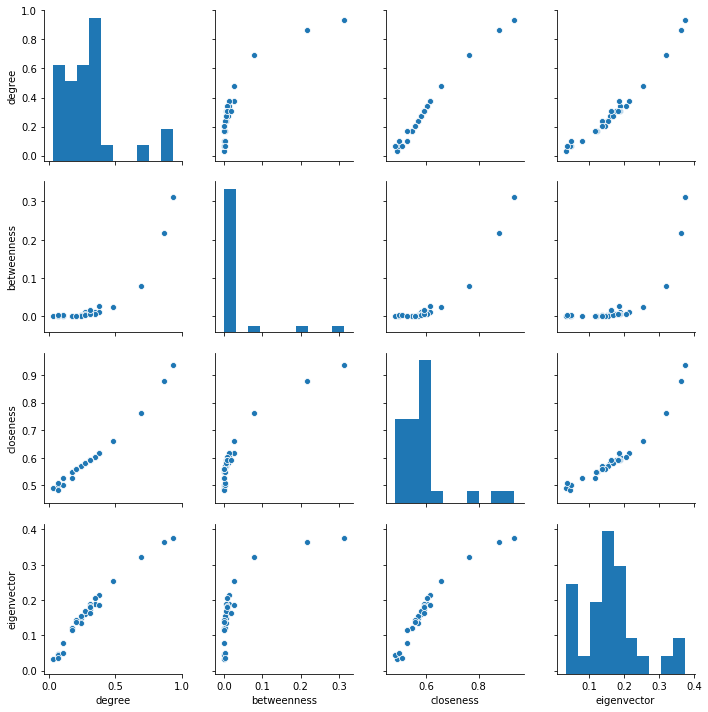

In [22]:
sns.pairplot(centrality)

In [23]:
# diameter
d=nx.diameter(G)
print("Diameter",end=' ')
print(d)

#aveerage path length
aspl=nx.average_shortest_path_length(G)
print("Average Shortest Path Length",end=' ')
print(aspl)

Diameter 3
Average Shortest Path Length 1.7195402298850575


<h3>Degree Distribution

Degree sequence
[27, 25, 20, 14, 11, 11, 10, 10, 9, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 3, 3, 2, 2, 2, 1]
Average Degree:	8.6


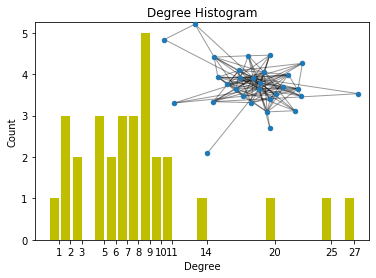

In [79]:
# degree distribution

import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
print ("Degree sequence")
print(degree_sequence)
print("Average Degree:",end="\t")
print(sum(degree_sequence)/len(degree_sequence))
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='y')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

(0.9, 10001)

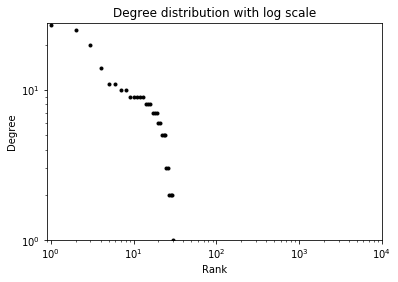

In [81]:
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)


<h3>Components

Just 1 big component


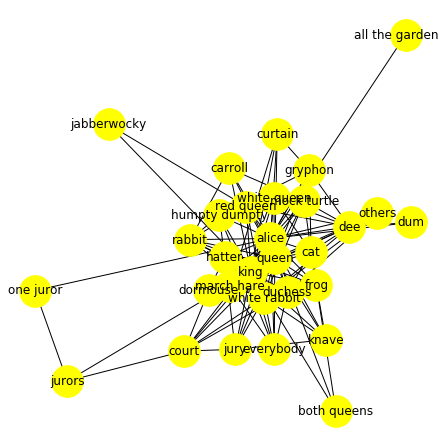

In [77]:
gc = max(nx.connected_component_subgraphs(G), key=len)
# gc
plt.figure(figsize=(6,6))
nx.draw(gc, node_size=1000, node_color='yellow', with_labels=True)
# nx.draw(G, node_size=500, node_color='yellow', with_labels=True)

print("Just 1 big component")

<h3> Assortattivity

In [26]:
# Degree assortativity in the graph
r=nx.degree_assortativity_coefficient(G)
print("Assortativity: ",end="")
print(r)

Assortativity: -0.3570577034185882


<h3> Clustering Coefficient

In [27]:
cl=nx.clustering(G)
print(cl)
avg_cl=sum(cl.values())/len(cl)
print("\n\nAverge Clustering Co-efficient:",end="")
print(avg_cl)

#for main nodes:
t=x[:5]
# print(x)
print("\n\nClustering Coefficient of:")
for ele in t:
    s= ele[0] +' '+ str(cl[ele[0]])
    print(s)

{'duchess': 0.6363636363636364, 'alice': 0.27635327635327633, 'king': 0.31333333333333335, 'everybody': 0.7142857142857143, 'white rabbit': 0.5164835164835165, 'march hare': 0.6388888888888888, 'dormouse': 0.6666666666666666, 'cat': 0.6, 'queen': 0.3736842105263158, 'red queen': 0.5555555555555556, 'dee': 0.43636363636363634, 'jabberwocky': 1.0, 'white queen': 0.8666666666666667, 'all the gardeners': 0, 'court': 0.6785714285714286, 'one juror': 0, 'hatter': 0.6666666666666666, 'rabbit': 0.6666666666666666, 'humpty dumpty': 0.6666666666666666, 'knave': 0.9333333333333333, 'gryphon': 0.6785714285714286, 'frog': 0.6888888888888889, 'curtain': 0.8, 'mock turtle': 0.75, 'both queens': 1.0, 'carroll': 0.9, 'others': 0.8, 'jury': 0.8571428571428571, 'jurors': 0.3333333333333333, 'dum': 1.0}


Averge Clustering Co-efficient:0.6338162123776158


Clustering Coefficient of:
alice 0.27635327635327633
king 0.31333333333333335
queen 0.3736842105263158
white rabbit 0.5164835164835165
duchess 0.636363

<h1><b> Community Detection</b></h1><br><h3><b> Louvain</b>

In [76]:
# Community Detection
#louvain

'''the community library has changed it now has a seperate package inside called as 
community_louvain.

installation command:
pip install python-louvain

will have to be imported as "community"
'''


'the community library has changed it now has a seperate package inside called as \ncommunity_louvain.\n\ninstallation command:\npip install python-louvain\n\nwill have to be imported as "community"\n'

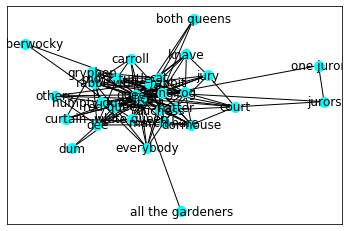

In [52]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [53]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['alice',
  'both queens',
  'carroll',
  'cat',
  'court',
  'curtain',
  'dee',
  'dormouse',
  'duchess',
  'dum',
  'everybody',
  'frog',
  'gryphon',
  'hatter',
  'humpty dumpty',
  'jabberwocky',
  'jury',
  'king',
  'knave',
  'march hare',
  'mock turtle',
  'others',
  'queen',
  'rabbit',
  'red queen',
  'white queen',
  'white rabbit'],
 ['all the gardeners'],
 ['jurors', 'one juror']]

In [54]:
part = community_louvain.best_partition(G)
print(part)

{'duchess': 0, 'alice': 1, 'king': 0, 'everybody': 0, 'white rabbit': 0, 'march hare': 2, 'dormouse': 2, 'cat': 1, 'queen': 0, 'red queen': 1, 'dee': 3, 'jabberwocky': 0, 'white queen': 1, 'all the gardeners': 1, 'court': 0, 'one juror': 0, 'hatter': 2, 'rabbit': 0, 'humpty dumpty': 1, 'knave': 0, 'gryphon': 1, 'frog': 0, 'curtain': 1, 'mock turtle': 1, 'both queens': 1, 'carroll': 1, 'others': 0, 'jury': 0, 'jurors': 0, 'dum': 3}


In [55]:
print(community_louvain.modularity(part, G))

0.17010888674173108


In [56]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 1, 2, 3]
[(0, 1), (0, 0), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]


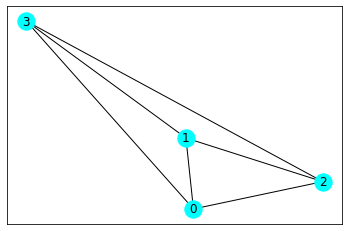

In [57]:
nx.draw_networkx(induced,node_color='cyan')

<h3>Clique Percolation

In [72]:
## Community using Clique percolation 

from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G,6))
print(c)


[frozenset({'king', 'gryphon', 'dee', 'mock turtle', 'alice', 'cat', 'queen'}), frozenset({'cat', 'duchess', 'knave', 'alice', 'white rabbit', 'hatter', 'king', 'frog', 'rabbit', 'dormouse', 'queen', 'court', 'march hare', 'jury'})]


In [73]:
len(c)

2

In [75]:
# nx.draw_networkx(c,node_color='red')